                              name  popularity  minutes
9                        Pido Cama          18     2.43
8  Qtfmp (Que Te Follen Mari Pili)          21     3.09
7                         Dedicado          22     3.97


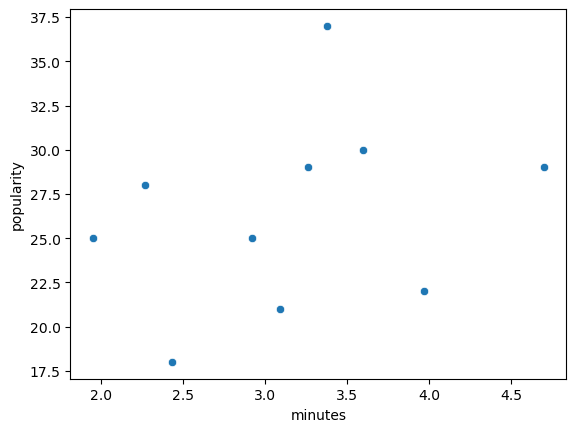

In [1]:
from dotenv import load_dotenv
import pandas as pd
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns
import matplotlib.pyplot as plt
#Carga el env
load_dotenv()    

#-> citamos el env
client_id = os.environ.get("CLIENT_ID")            
client_secret = os.environ.get("CLIENT_SECRET")    

#-> Codigo propio de Spotify /  #-> Cada pregunta solicitará id y secret
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id = client_id, client_secret = client_secret))


#-> en la web de spotify nos da el artista                     
artista = "2bKySOuviZxzwqrxu7Xq0w"                  

#-> sp (es la forma de citar spotify) / artist_top_tracks
var = sp.artist_top_tracks(artista)              

top_tracks = var["tracks"]

list = []

#-> For que itera sobre la informacionsacada en top track
#-> min: round (redondea transforma milisegundos en min / 2 este 2 limita el round a 2 unidades)
#-> list.append (crea un diccionario (clave/valor))
for iterador in top_tracks:
    nombre = iterador["name"]
    popularidad = iterador ["popularity"]
    duracion = iterador ["duration_ms"]
    minuto = round(duracion / 60000,2)
    list.append({"name":nombre,"popularity":popularidad,"minutes":minuto})

#-> Creamos un DataFrame
#-> from_records (Transforma un diccionario de forma automatica a un DataFrame)
dataframe = pd.DataFrame.from_records(list)

#-> Imprimimos DataFrame (Saca 10 porque es automatico)
#print (dataframe)

#-> Ordenar por popularidad (Mostrar el top3)

#implace "en el sitio" Que haga el sort_values dentro (que lo saque al reves)
dataframe.sort_values(["popularity"], inplace=True)

print (dataframe.head(3))

#-> El data es para buscar los datos en el dataframe
sns.scatterplot(data = dataframe, x = "minutes", y = "popularity")
plt.show()
